In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [2]:
file = open('Lab6MetalCan.csv', 'r')
time_total_can, temperature_total_can  = np.loadtxt("Lab6MetalCan.csv", delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

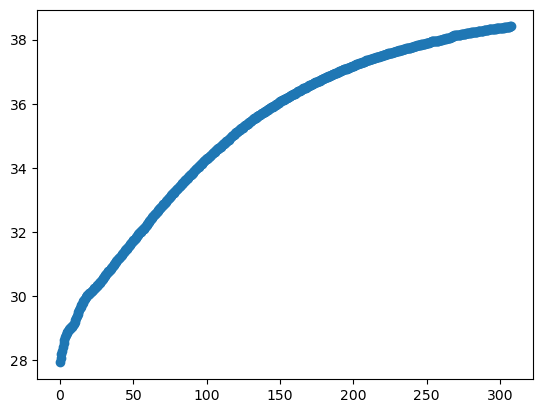

In [16]:
plt.scatter(time_total_can, temperature_total_can)

In [23]:
start_time = 10
stop_time = 40
in_range = (time_total_can >= start_time) & (time_total_can <= stop_time)
time_can, temperature_can = time_total_can[in_range], temperature_total_can[in_range]

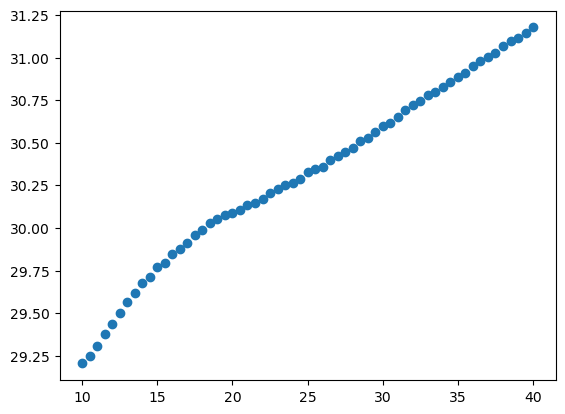

In [24]:
plt.scatter(time_can, temperature_can)

Fitted delta_T0: 28.849627162297878
Fitted beta: 507.93160436923034


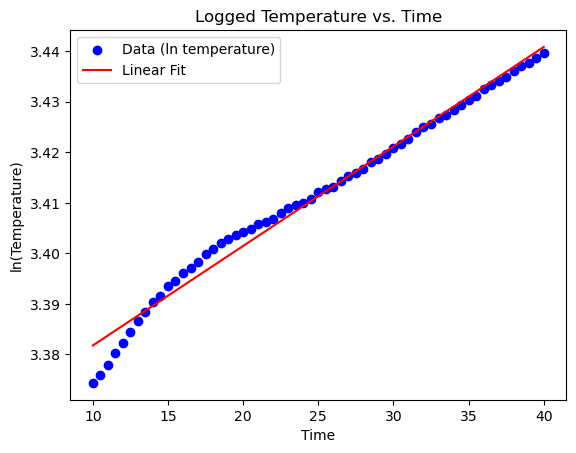

In [30]:
ln_temperature_can = np.log(temperature_can)

slope_can, intercept_can, r_value_can, p_value_can, std_err_can = linregress(time_can, ln_temperature_can)

T0_fit_can = np.exp(intercept_can)
beta_fit_can = 1 / slope_can

print(f"Fitted delta_T0: {T0_fit_can}")
print(f"Fitted beta: {beta_fit_can}")

plt.scatter(time_can, ln_temperature_can, label='Data (ln temperature)', color='blue')
plt.plot(time_can, slope_can * time_can + intercept_can, label='Linear Fit', color='red')
plt.xlabel('Time')
plt.ylabel('ln(Temperature)')
plt.title("Logged Temperature vs. Time")
plt.legend()
plt.show()

In [31]:
m = 0.087 # kg
c = 4184 # J / kg C
l = 6e-5 # m
A = 2 * np.pi * 3.523 * 4 * 10 ** -4 #m^2
beta_can = beta_fit_can 

k = (m * c * l) / (A * beta_can)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.004856288059384295


Fitted ΔT₀: -4.010404000774991
Fitted β: 14.122417950549774


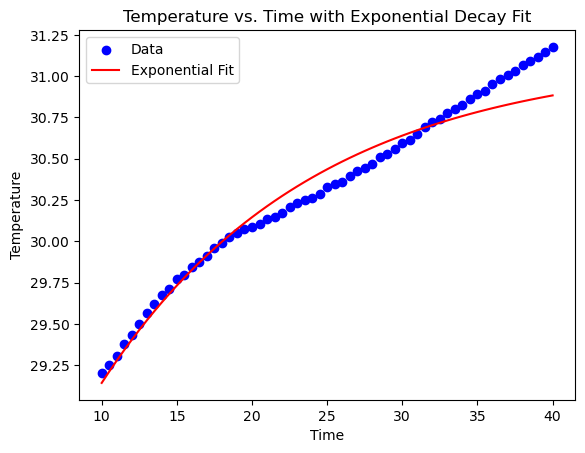

In [32]:
T_final = np.mean(temperature_can[-5:])  
Delta_T = temperature_can - T_final      

def exponential_model(t, T0, beta):
    return T0 * np.exp(-t / beta) + T_final

initial_guess = [temperature_can[0], 100]  
params, covariance = curve_fit(exponential_model, time_can, temperature_can, p0=initial_guess)
T0_fit, beta_fit_can = params

print(f"Fitted ΔT₀: {T0_fit}")
print(f"Fitted β: {beta_fit_can}")

T_model = exponential_model(time_can, T0_fit, beta_fit_can)

plt.scatter(time_can, temperature_can, label="Data", color="blue")
plt.plot(time_can, T_model, label="Exponential Fit", color="red")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Temperature vs. Time with Exponential Decay Fit")
plt.legend()
plt.show()


In [14]:
m = 0.087 # kg
c = 4184 # J/ kg C
l = 0.000127 # m
A = 2 * np.pi * 3.523 * 4 *10**-4 #m^2
beta_can = beta_fit_can 

k = (m * c * l) / (A * beta_can)
print(f"Calculated k: {k}") # W/msC

Calculated k: 0.07086383998878121
